Task: Analyze Customer Purchase Data

Scenario:

You are provided with a dataset containing customer purchase information. Your goal is to clean the data, extract meaningful insights, and prepare it for further analysis. The dataset includes columns such as CustomerID, Date, Category, Sub-Category, Amount, and Quantity.

Steps:
	1.	Import the Dataset:
	•	Assume the dataset is in a CSV file named customer_purchases.csv.
	2.	Data Cleaning:
	•	Handle missing values in the dataset:
	•	If Amount or Quantity is missing, fill it with the column mean.
	•	Drop rows where CustomerID is missing.
	•	Convert the Date column to datetime format.
	3.	Feature Engineering:
	•	Create a new column called TotalCost by multiplying Amount and Quantity.
	•	Extract the year and month from the Date column and add them as new columns (Year and Month).
	4.	Data Transformation:
	•	Group the data by Category and calculate:
	•	Total revenue (TotalCost).
	•	Average Quantity purchased per Category.
	•	Identify the top 3 most purchased sub-categories based on total Quantity.
	5.	Outlier Detection and Handling:
	•	Use NumPy to identify outliers in the Amount column using the IQR (Interquartile Range) method.
	•	Replace the outliers with the upper bound of the normal range.
	6.	Pivot Table Creation:
	•	Create a pivot table showing total revenue (TotalCost) by Year and Category.
	7.	Visualization (Optional):
	•	Use Matplotlib or Seaborn to create:
	•	A bar plot showing revenue by Category.
	•	A line plot showing revenue trends over time.

Dataset Example:

CustomerID	Date	Category	Sub-Category	Amount	Quantity
101	2025-01-01	Apparel	Shirts	50.0	2
102	2025-01-03	Electronics	Phones	300.0	1
103	2025-01-05	Apparel	Pants	NaN	1
104	2025-01-08	Furniture	Tables	200.0	2

Expected Outputs:
	1.	A cleaned and transformed dataset.
	2.	Insights such as:
	•	Total revenue and average quantity per category.
	•	Top 3 most purchased sub-categories.
	3.	A pivot table summarizing revenue by year and category.
	4.	Visualizations (if implemented).

Let me know if you want a sample dataset or implementation guidance for any step!

In [2]:
import pandas as pd

data = {
    'CustomerID': [101, 102, 103, 104, 105, 106],
    'Date': ['2025-01-01', '2025-01-03', '2025-01-05', '2025-01-08', '2025-01-10', '2025-01-12'],
    'Category': ['Apparel', 'Electronics', 'Apparel', 'Furniture', 'Electronics', 'Apparel'],
    'Sub-Category': ['Shirts', 'Phones', 'Pants', 'Tables', 'Laptops', 'Shirts'],
    'Amount': [50.0, 300.0, None, 200.0, 700.0, 55.0],
    'Quantity': [2, 1, 1, 2, 1, 3]
}

# Load the data into a pandas DataFrame
df = pd.DataFrame(data)

# Show the DataFrame
df

,CustomerID,Date,Category,Sub-Category,Amount,Quantity
0,101,2025-01-01,Apparel,Shirts,50.0,2
1,102,2025-01-03,Electronics,Phones,300.0,1
2,103,2025-01-05,Apparel,Pants,NaN,1
3,104,2025-01-08,Furniture,Tables,200.0,2
4,105,2025-01-10,Electronics,Laptops,700.0,1
5,106,2025-01-12,Apparel,Shirts,55.0,3


In [3]:
df.isnull().sum()

CustomerID      0
Date            0
Category        0
Sub-Category    0
Amount          1
Quantity        0
dtype: int64

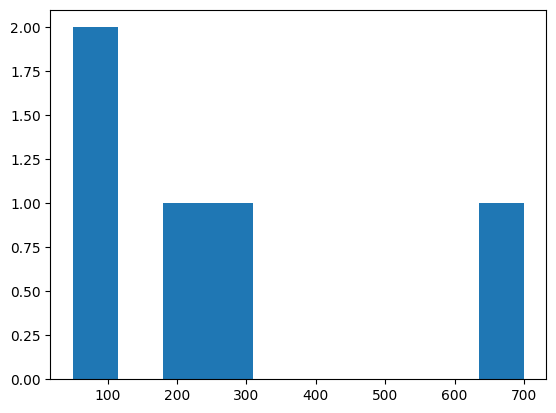

In [4]:
import matplotlib.pyplot as plt

plt.hist(df['Amount'])
plt.show()

In [5]:
df['Amount'] = df['Amount'].fillna(df['Amount'].median())

In [6]:
df.dtypes

CustomerID        int64
Date             object
Category         object
Sub-Category     object
Amount          float64
Quantity          int64
dtype: object

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Year'] = df['Date'].dt.year

In [9]:
df['Year']

0    2025
1    2025
2    2025
3    2025
4    2025
5    2025
Name: Year, dtype: int32

In [10]:
df['Month'] = df['Date'].dt.month

In [11]:
df['Month']

0    1
1    1
2    1
3    1
4    1
5    1
Name: Month, dtype: int32

In [12]:
df['total_cost'] = df['Amount'] * df['Quantity']

In [13]:
df

,CustomerID,Date,Category,Sub-Category,Amount,Quantity,Year,Month,total_cost
0,101,2025-01-01,Apparel,Shirts,50.0,2,2025,1,100.0
1,102,2025-01-03,Electronics,Phones,300.0,1,2025,1,300.0
2,103,2025-01-05,Apparel,Pants,200.0,1,2025,1,200.0
3,104,2025-01-08,Furniture,Tables,200.0,2,2025,1,400.0
4,105,2025-01-10,Electronics,Laptops,700.0,1,2025,1,700.0
5,106,2025-01-12,Apparel,Shirts,55.0,3,2025,1,165.0


In [16]:
df.groupby('Category')['total_cost'].mean()

Category
Apparel        155.0
Electronics    500.0
Furniture      400.0
Name: total_cost, dtype: float64

In [17]:
df.groupby('Category')['Quantity'].mean()

Category
Apparel        2.0
Electronics    1.0
Furniture      2.0
Name: Quantity, dtype: float64

In [27]:
df.groupby('Sub-Category')['Quantity'].sum().nlargest(3)

Sub-Category
Shirts     5
Tables     2
Laptops    1
Name: Quantity, dtype: int64

In [33]:
numeric_col = df.select_dtypes('number').drop(['CustomerID','Year','Month'],axis=1)

In [34]:
numeric_col

,Amount,Quantity,total_cost
0,50.0,2,100.0
1,300.0,1,300.0
2,200.0,1,200.0
3,200.0,2,400.0
4,700.0,1,700.0
5,55.0,3,165.0


In [37]:
def plot_boxplot(data):
    plt.boxplot(data)
    plt.show()

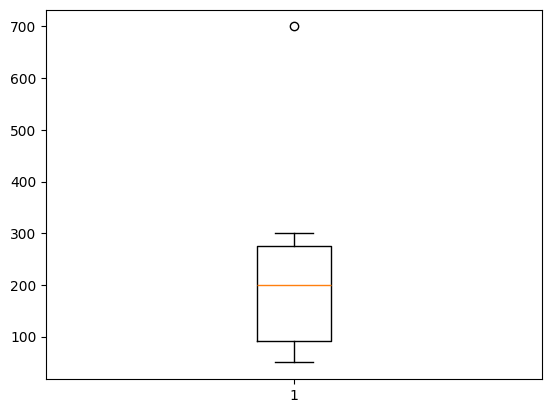

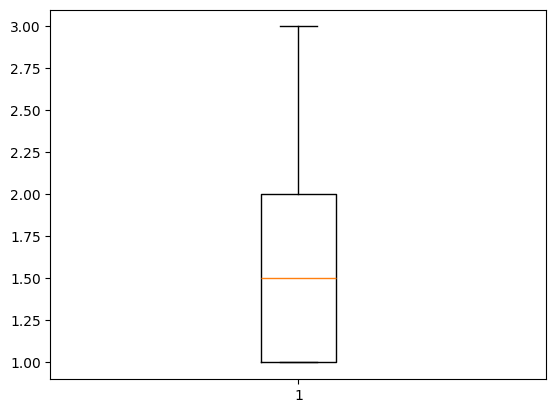

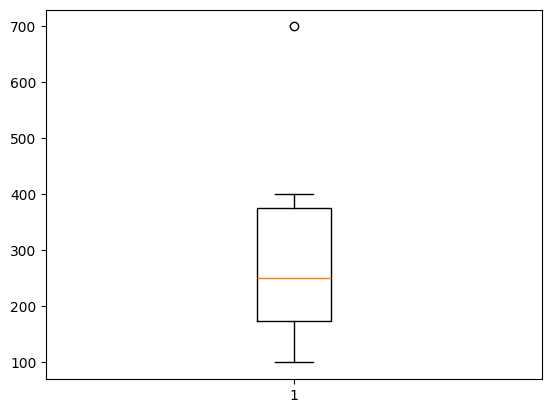

In [38]:
for col in numeric_col:
    plot_boxplot(df[col])

In [39]:
df

,CustomerID,Date,Category,Sub-Category,Amount,Quantity,Year,Month,total_cost
0,101,2025-01-01,Apparel,Shirts,50.0,2,2025,1,100.0
1,102,2025-01-03,Electronics,Phones,300.0,1,2025,1,300.0
2,103,2025-01-05,Apparel,Pants,200.0,1,2025,1,200.0
3,104,2025-01-08,Furniture,Tables,200.0,2,2025,1,400.0
4,105,2025-01-10,Electronics,Laptops,700.0,1,2025,1,700.0
5,106,2025-01-12,Apparel,Shirts,55.0,3,2025,1,165.0


In [40]:
df.groupby('Category')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Apparel,3.0,101.666667,85.195853,50.0,52.5,55.0,127.5,200.0
Electronics,2.0,500.000000,282.842712,300.0,400.0,500.0,600.0,700.0
Furniture,1.0,200.000000,NaN,200.0,200.0,200.0,200.0,200.0


In [41]:
import numpy as np

In [42]:
df['Log_Amount'] = np.log(df['Amount'])

In [43]:
df

,CustomerID,Date,Category,Sub-Category,Amount,Quantity,Year,Month,total_cost,Log_Amount
0,101,2025-01-01,Apparel,Shirts,50.0,2,2025,1,100.0,3.912023
1,102,2025-01-03,Electronics,Phones,300.0,1,2025,1,300.0,5.703782
2,103,2025-01-05,Apparel,Pants,200.0,1,2025,1,200.0,5.298317
3,104,2025-01-08,Furniture,Tables,200.0,2,2025,1,400.0,5.298317
4,105,2025-01-10,Electronics,Laptops,700.0,1,2025,1,700.0,6.551080
5,106,2025-01-12,Apparel,Shirts,55.0,3,2025,1,165.0,4.007333


In [50]:
pd.pivot_table(data=df,index='Year',columns='Category',values='total_cost',aggfunc=['sum','mean'])

sum                          mean                      
Category Apparel Electronics Furniture Apparel Electronics Furniture
Year                                                                
2025       465.0      1000.0     400.0   155.0       500.0     400.0

	7.	Visualization (Optional):
	•	Use Matplotlib or Seaborn to create:
	•	A bar plot showing revenue by Category.
	•	A line plot showing revenue trends over time.

<BarContainer object of 6 artists>

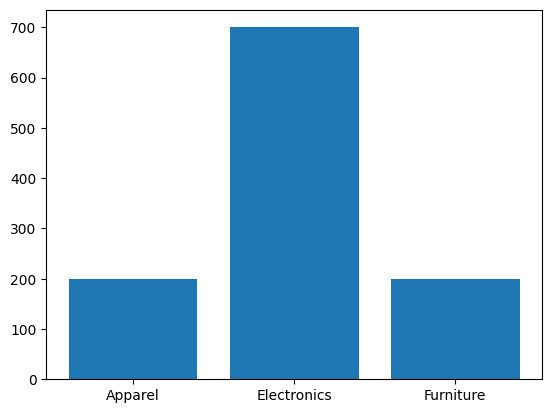

In [56]:
plt.bar(x=df['Category'],height=df['Amount'])

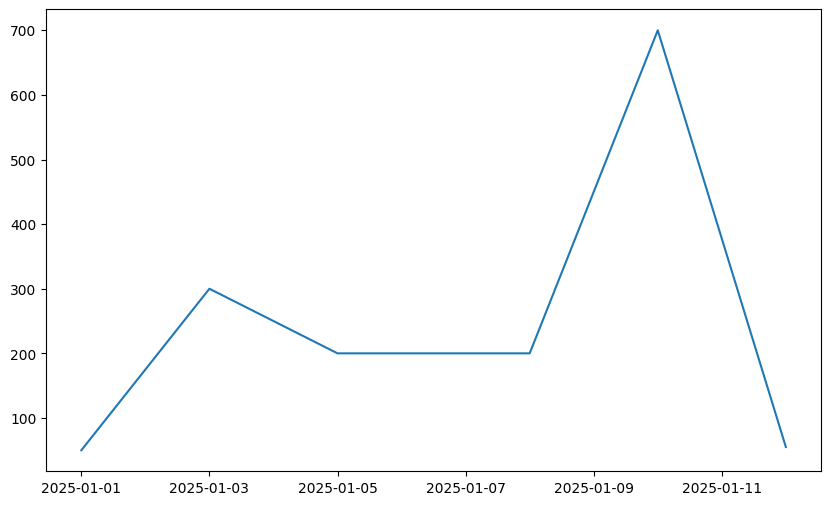

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel('Time')
plt.ylabel()
plt.plot(df['Date'],df['Amount'])
plt.show()